<a href="https://colab.research.google.com/github/Shankar-Pankhania/Twitter_Sentiment_Analysis_on_Bitcoin/blob/main/Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to Google Drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Dissertation/

Import Package

In [7]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

Dataset

In [5]:
total_dataset = pd.read_csv('Data_to_hourly_intervals.csv')
bitcoin_prices = pd.read_csv('Bitcoin_prices.csv')

total_dataset = total_dataset.set_index('Timestamp')
total_dataset.index = pd.to_datetime(total_dataset.index)

bitcoin_prices = bitcoin_prices.set_index('Timestamp')
bitcoin_prices.index = pd.to_datetime(bitcoin_prices.index)

#add change column
bitcoin_prices['Change'] = bitcoin_prices['Close'] - bitcoin_prices['Open']

# These are the "Tableau 20" colors that represent RGB.  
tableau20RGB = [(252,79,48),(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120), (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150), (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148), (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# We now scale the "Tableau 20" values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20RGB)):
    r, g, b = tableau20RGB[i]
    tableau20RGB[i] = (r / 255., g / 255., b / 255.)


Plot change in bitcoin price

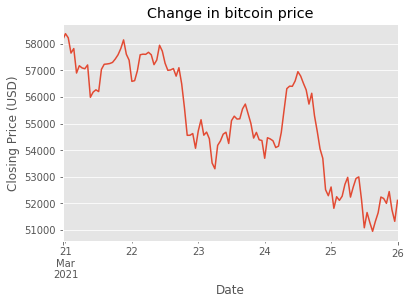

In [11]:
bitcoin_prices['Close'].plot()
plt.title('Change in bitcoin price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

Plot histogram of sentiment

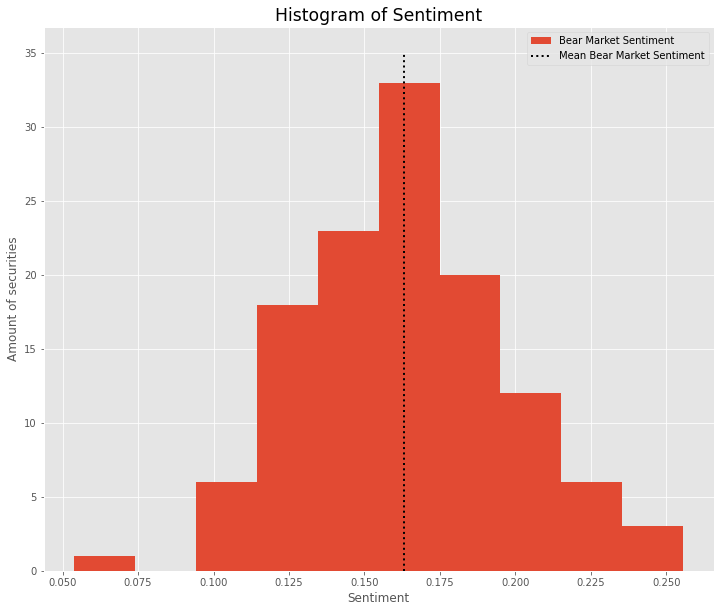

In [12]:
#distribution of the sentiment durning bear market
plt.figure(figsize = (12,10))
plt.hist([total_dataset[total_dataset.index > '2021-03-01 00:00:00']['compound_total']], label='Bear Market Sentiment', histtype ='stepfilled', stacked= True)
plt.vlines(total_dataset[total_dataset.index > '2021-03-01 00:00:00']['compound_total'].mean(), 0, 35, linestyle='dotted', linewidth=2, label = 'Mean Bear Market Sentiment')

plt.title('Histogram of Sentiment', fontsize = 'xx-large')
plt.ylabel('Amount of securities')
plt.xlabel('Sentiment')

plt.legend(loc='upper right')
plt.show()

Compare Bitcoin Price change against Tweet Sentiment

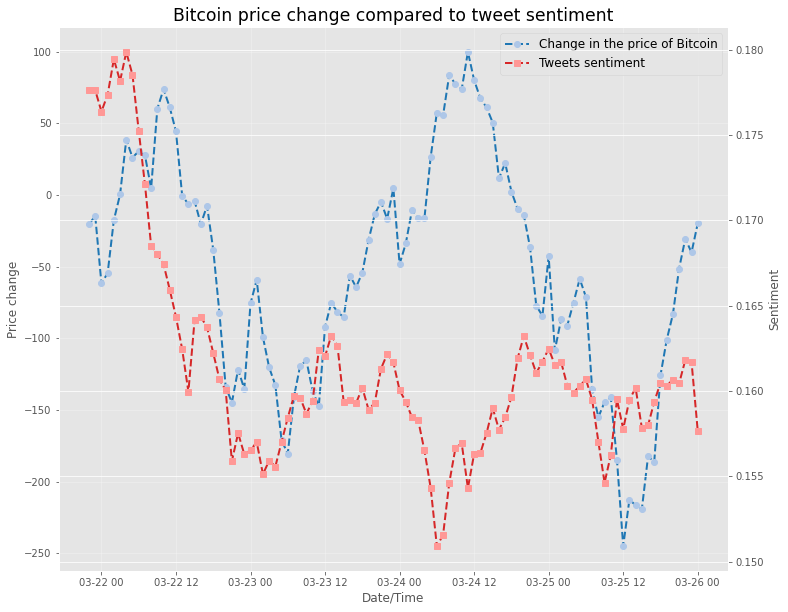

In [13]:
dataset_12h_MA_Sent = total_dataset[total_dataset.index > '2021-03-01 00:00:00']['compound_total'].fillna(method = 'ffill').rolling(window=24).mean()
dataset_12h_MA_Change = bitcoin_prices[bitcoin_prices.index > '2021-03-01 00:00:00']['Change'].fillna(method = 'ffill').rolling(window=24).mean()

fig, ax1 = plt.subplots(figsize = (12,10))
BitcoinPriceLabel = ax1.plot(dataset_12h_MA_Change, label='Change in the price of Bitcoin', linewidth=2, linestyle='dashed', marker='o', markerfacecolor = tableau20RGB[2], markeredgecolor = tableau20RGB[2], c=tableau20RGB[1])
ax1.set_title('Bitcoin price change compared to tweet sentiment', fontsize = 'xx-large')
ax1.set_ylabel('Price change')
ax1.set_xlabel('Date/Time')
ax1.grid(alpha=.3)

ax2 = ax1.twinx()
TweetSentimentLabel = ax2.plot(dataset_12h_MA_Sent, label='Tweets sentiment',marker = 's', markerfacecolor = tableau20RGB[8], markeredgecolor= tableau20RGB[8], linestyle='dashed', linewidth=2, c=tableau20RGB[7])
ax2.set_ylabel('Sentiment')

lsb = BitcoinPriceLabel + TweetSentimentLabel
labs = [l.get_label() for l in lsb]
ax1.legend(lsb, labs,fontsize= 'large', loc = 'upper right')
plt.show()

Scatter plot that represents the average sentiment on the Y-axis with the price change on the X-axis

Text(0.5, 1.0, 'Sentiment scatter plot against Bitcoin')

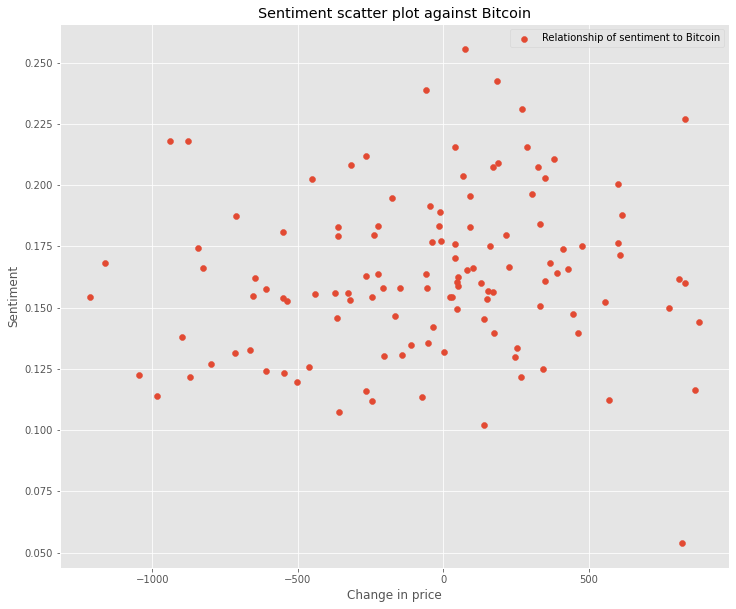

In [14]:
plt.figure(figsize=(12,10))
plt.scatter(bitcoin_prices['Change'], total_dataset['compound_total'], label="Relationship of sentiment to Bitcoin")
plt.legend()
plt.ylabel('Sentiment')
plt.xlabel('Change in price')
plt.title("Sentiment scatter plot against Bitcoin")

Computes the correlation between volume of tweets and price of Bitcoin

In [ ]:
#I want to see how the sentiment of today affects the Bitcoin price in the future. 
Autocorrelation = []
n = 0
for i in range(len(total_dataset)):
    correlation_df = bitcoin_prices[['Change']]
    correlation_df[['Compound_Score']] = total_dataset[['compound_total']].shift(i)
    correlation = correlation_df.corr()['Change'][1]
    if str(correlation) == 'nan':
        break
    Autocorrelation.append(correlation)

Autocorrelation between sentiment and price change over time

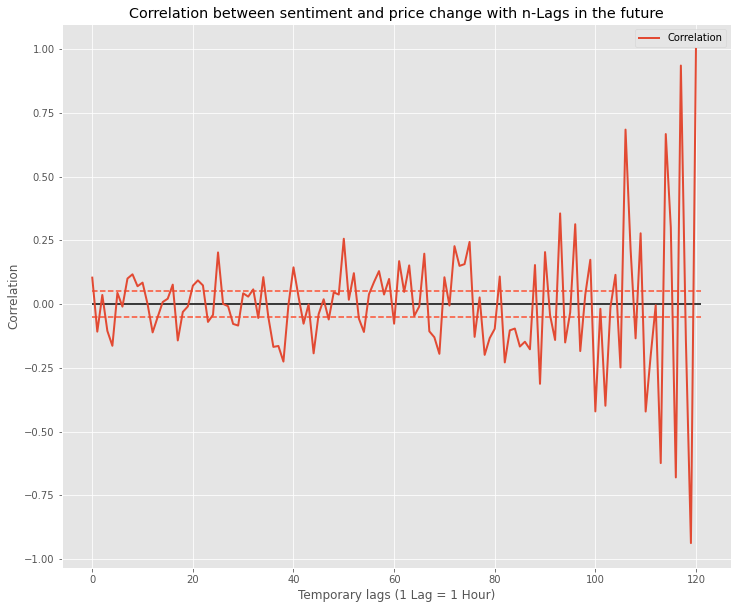

In [16]:
plt.figure(figsize=(12,10))
plt.plot(Autocorrelation, linewidth = 2, label = 'Correlation' )
plt.title('Correlation between sentiment and price change with n-Lags in the future')
plt.hlines(0.05, 0, len(Autocorrelation), linestyles = 'dashed', colors = tableau20RGB[0], linewidth = 1.5)
plt.hlines(0, 0, len(Autocorrelation), linestyles = 'solid', colors = 'black')
plt.hlines(-0.05, 0, len(Autocorrelation), linestyles = 'dashed', colors = tableau20RGB[0], linewidth = 1.5)
plt.ylabel('Correlation');
plt.legend()
plt.xlabel('Temporary lags (1 Lag = 1 Hour)')

plt.show();

Plot the Bitcoin price against tweet volumes

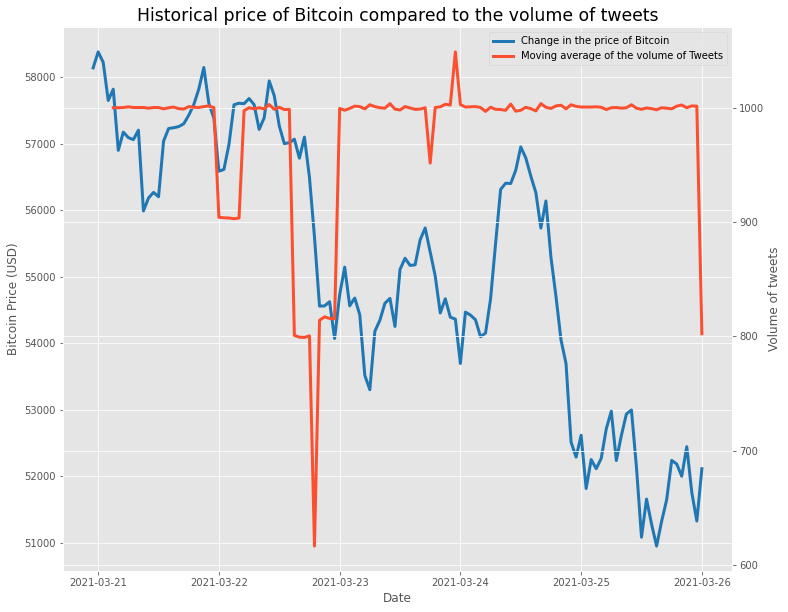

In [17]:
#moving average
MA_Tweets = total_dataset['total_volume_of_tweets'].fillna(method = 'ffill').rolling(window=5).mean()

fig, ax1 = plt.subplots(figsize = (12,10))
ClosePrice = ax1.plot(bitcoin_prices['Close'], label='Change in the price of Bitcoin', linewidth=3, c=tableau20RGB[1])
ax1.set_title('Historical price of Bitcoin compared to the volume of tweets', fontsize = 'xx-large')
ax1.set_ylabel('Bitcoin Price (USD)')
ax1.set_xlabel('Date')

#Volume of tweets
ax2 = ax1.twinx()
MA_Volume_tweets = ax2.plot(MA_Tweets, label='Moving average of the volume of Tweets' , linewidth=3, c=tableau20RGB[0])
ax2.set_ylabel('Volume of tweets')

#displays the label box in the top right corner
lsb = ClosePrice + MA_Volume_tweets
labs = [l.get_label() for l in lsb]
ax1.legend(lsb, labs,fontsize= 'medium', loc = 'upper right')
plt.show()

Compute correlation between volume and price change over time

In [ ]:
Autocorrelation_volume = []
n = 0
for a in range(1500):
    correlation_df = bitcoin_prices[['Close']]
    correlation_df[['Total Volume of Tweets']] = total_dataset[['total_volume_of_tweets']].shift(a)
    cor = correlation_df.corr()['Close'][1]
    if str(cor) == 'nan':
        break
    Autocorrelation_volume.append(cor)

Autocorrelation between volume and price change over time

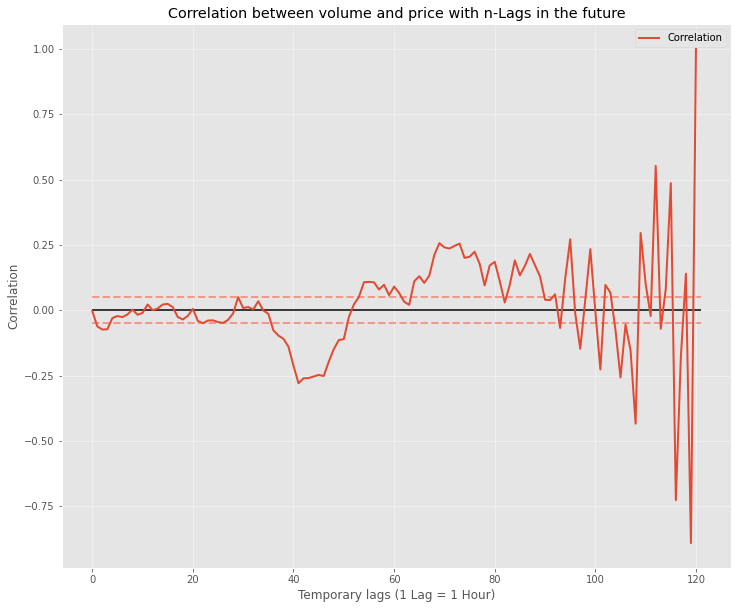

In [19]:
plt.figure(figsize=(12,10))
plt.plot(Autocorrelation_volume, linewidth = 2, label = 'Correlation' )
plt.title('Correlation between volume and price with n-Lags in the future')
plt.hlines(0.05, 0, len(Autocorrelation_volume), linestyles = 'dashed', colors = tableau20RGB[0], linewidth = 2, alpha = 0.5)
plt.hlines(0, 0, len(Autocorrelation_volume), linestyles = 'solid', colors = 'black')
plt.hlines(-0.05, 0, len(Autocorrelation_volume), linestyles = 'dashed', colors = tableau20RGB[0], linewidth = 2, alpha = 0.5)
plt.ylabel('Correlation');
plt.legend()
plt.xlabel('Temporary lags (1 Lag = 1 Hour)')
plt.grid(alpha = 0.5)

plt.show();

Volume of Bitcoin

Text(0, 0.5, 'Transactions')

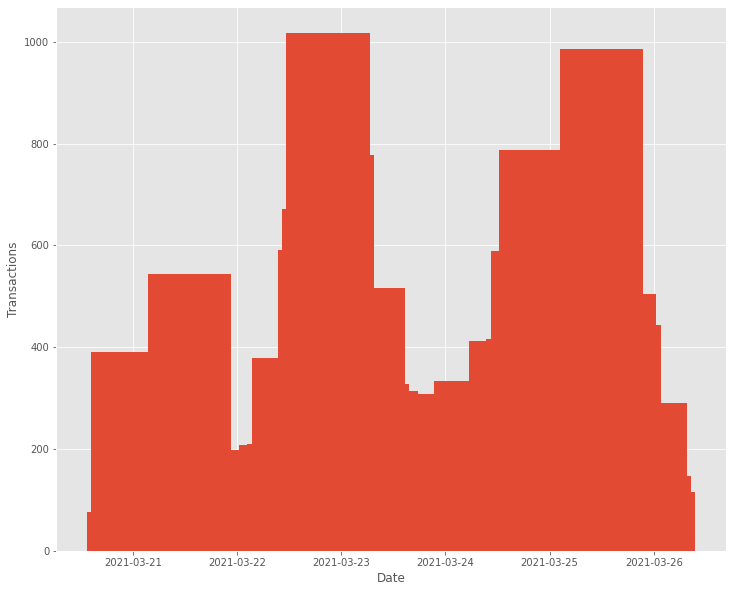

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
ax.bar(bitcoin_prices.index, bitcoin_prices['Volume (BTC)'])
plt.xlabel("Date")
plt.ylabel("Transactions")

Plot of price volatility by hour

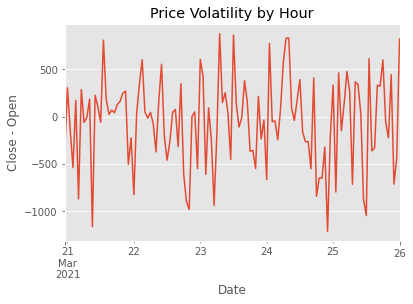

In [ ]:
(bitcoin_prices['Close']-bitcoin_prices['Open']).plot()
plt.title('Price Volatility by Hour')
plt.xlabel('Date')
plt.ylabel('Close - Open')
plt.show()

Plot Percentage Change

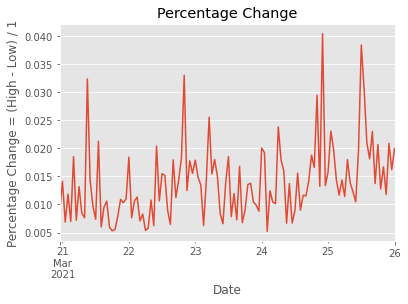

In [ ]:
Percentage_change = (bitcoin_prices['High']/bitcoin_prices['Low']) -1
Percentage_change.plot()
plt.title('Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change = (High - Low) / 1')
plt.show()

Plot Tweet Volume

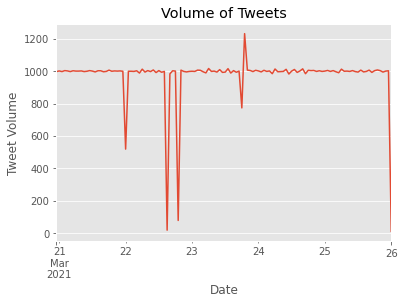

In [21]:
total_dataset['total_volume_of_tweets'].plot()
plt.title('Volume of Tweets')
plt.xlabel('Date')
plt.ylabel('Tweet Volume')
plt.show()

Plot Total Sentiments

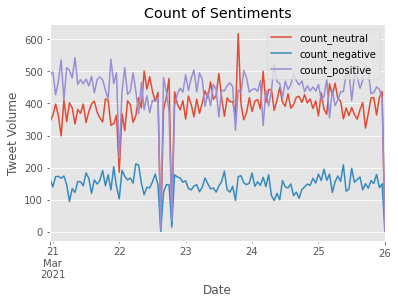

In [ ]:
total_dataset[['count_neutral', 'count_negative', 'count_positive']].plot()
plt.title('Count of Sentiments')
plt.xlabel('Date')
plt.ylabel('Tweet Volume')
plt.show()